In [65]:
from fastbook import *

In [66]:
url = search_images_ddg('closed fist images', max_images = 1)
download_url(url[0], 'stone.jpg')

Path('stone.jpg')

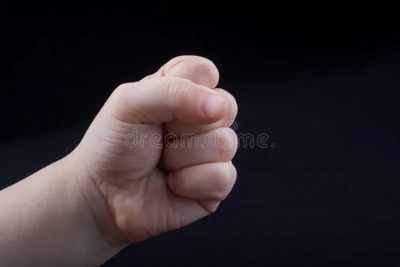

In [67]:
Image.open('stone.jpg').to_thumb(400, 400)

In [68]:
url = search_images_ddg('palm with hand images', max_images = 1)
download_url(url[0], 'paper.jpg')

Path('paper.jpg')

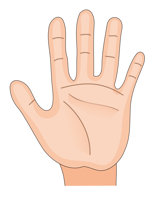

In [69]:
Image.open('paper.jpg').to_thumb(200, 200)

In [70]:
url = search_images_ddg('victory symbol in real hand images', max_images = 1)
download_url(url[0], 'scissor.jpg')

Path('scissor.jpg')

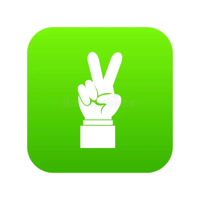

In [71]:
Image.open('scissor.jpg').to_thumb(200, 200)

In [72]:
pwd

"C:\\Users\\LENOVO\\Desktop\\Sonali's Folder\\Desktop files\\TRT\\Python\\Stone Paper Scissor"

In [35]:
search_items = 'closed fist with real hand images', 'open single palm with real hand images', 'victory showing real hand images'
path = Path('stone_paper_scissor')

for item in search_items:
    if(item == 'closed fist with real hand images'):
        dest = (path/'stone')
    elif(item == 'open single palm with real hand images'):
        dest = (path/'paper')
    else:
        dest = (path/'scissor')
        
    dest.mkdir(exist_ok = True, parents = True)
    download_images(dest, urls = search_images_ddg(item, max_images = 30))

In [74]:
failed = verify_images(get_image_files(path))
print(len(failed))

0


In [37]:
failed.map(Path.unlink)

(#4) [None,None,None,None]

In [119]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')],
    batch_tfms = aug_transforms()
).dataloaders(path, bs = 5)

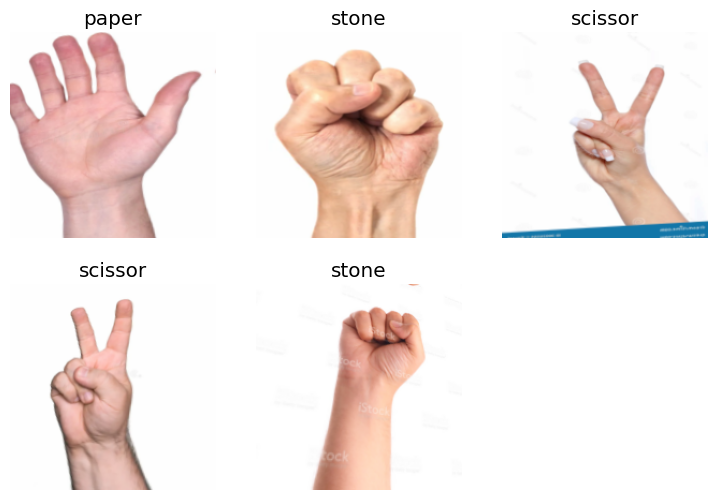

In [125]:
dls.show_batch(max_n = 5)

In [126]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.714385,0.531282,0.333333,00:09


C:\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.064517,0.529262,0.111111,00:10
1,0.926385,0.304982,0.222222,00:10
2,0.745632,0.135739,0.000000,00:15
3,0.641971,0.152533,0.000000,00:13


In [127]:
learn.predict('scissor.jpg')

('scissor', tensor(1), tensor([6.2689e-03, 9.9315e-01, 5.8240e-04]))

In [128]:
learn.predict('stone.jpg')

('stone', tensor(2), tensor([0.0737, 0.0067, 0.9196]))

In [131]:
learn.predict('paper.jpeg')

('paper', tensor(0), tensor([0.7201, 0.1964, 0.0835]))

In [132]:
interp = ClassificationInterpretation.from_learner(learn)

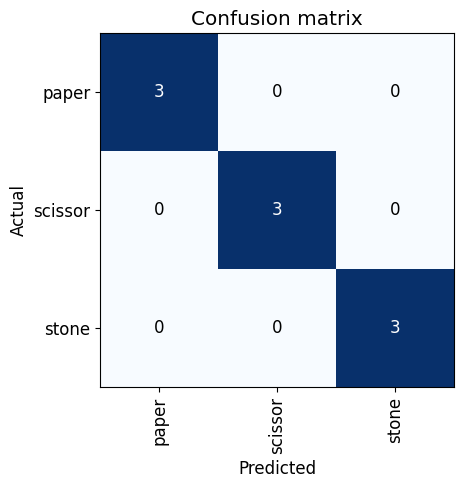

In [133]:
interp.plot_confusion_matrix()

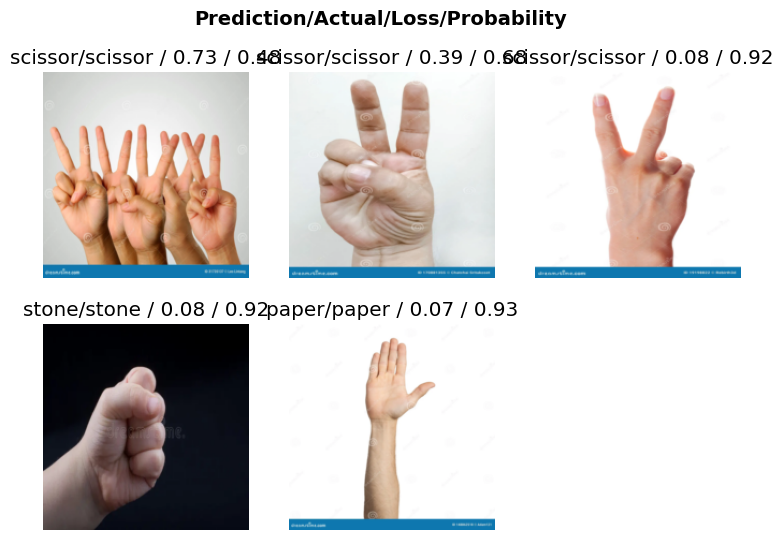

In [134]:
interp.plot_top_losses(5)

In [90]:
from fastai.vision.widgets import *

In [135]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [93]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

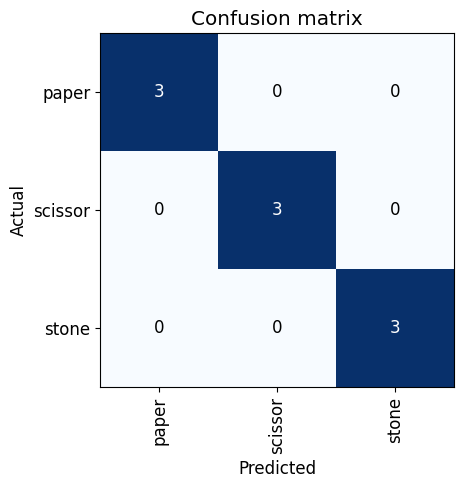

In [136]:
interp.plot_confusion_matrix()

In [95]:
learn.predict('stone.jpg')

('stone', tensor(2), tensor([0.1075, 0.0014, 0.8911]))

In [96]:
learn.predict('paper.jpg')

('paper', tensor(0), tensor([0.7343, 0.0016, 0.2641]))

In [100]:
learn.predict('scissor.jpg')

('scissor', tensor(1), tensor([0.0401, 0.9501, 0.0098]))

In [101]:
learn.export()

In [138]:
labels = learn.dls.vocab

In [137]:
import gradio as gr

In [105]:
title = "Stone Paper Scissor Classifier"
description = "A stone paper scissor classifier trained on the downloaded dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."

In [141]:
examples = ['stone.jpg', 'paper.jpeg', 'scissor.jpg']

In [108]:
interpretation = 'default'


In [109]:
enable_queue = True

In [139]:
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [142]:
gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch(share=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18380\3874061369.py:1: UserWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch(share=True)


Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app. 

Also please ensure that your antivirus or firewall is not blocking the binary file located at: C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\gradio\frpc_windows_amd64_v0.2
